In [1]:
# pip install patool

In [2]:
# import patoolib
# patoolib.extract_archive("/content/drive/MyDrive/Spark Project/vehicles_final.rar", outdir="/content/drive/MyDrive/Spark Project/")

In [3]:
#Importing Numpy and Pandas
import numpy as np
import pandas as pd

In [4]:
# pip install pyunpack


##Data Cleaning

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
pip install pyspark

In [7]:
from pyspark.sql import SparkSession

# Create a SparkSession

spark = SparkSession.builder.appName("FrequentYear").getOrCreate()

# Load up data as dataframe
data = spark.read.option("header", "true").option("inferSchema", "true") \
    .csv("/content/drive/MyDrive/Spark Project/vehicles_final.csv")

# data.printSchema()

sortdata1=data.select('year').na.drop(subset=["year"]).groupBy("year").count().sort("count",ascending=False)


sortdata1.show()



+----+-----+
|year|count|
+----+-----+
|2018| 9238|
|2017| 9179|
|2015| 7867|
|2013| 7600|
|2016| 7509|
|2014| 7394|
|2019| 6492|
|2012| 5932|
|2020| 4785|
|2011| 4618|
|2008| 4026|
|2007| 3689|
|2006| 3377|
|2010| 3315|
|2005| 2772|
|2009| 2597|
|2004| 2336|
|2003| 1840|
|2002| 1636|
|2001| 1287|
+----+-----+
only showing top 20 rows



In [8]:
type(sortdata1)

pyspark.sql.dataframe.DataFrame

In [9]:
sortdata1.printSchema()

root
 |-- year: string (nullable = true)
 |-- count: long (nullable = false)



In [10]:
pandasDF1 = sortdata1.toPandas()
print(pandasDF1[:20])

    year  count
0   2018   9238
1   2017   9179
2   2015   7867
3   2013   7600
4   2016   7509
5   2014   7394
6   2019   6492
7   2012   5932
8   2020   4785
9   2011   4618
10  2008   4026
11  2007   3689
12  2006   3377
13  2010   3315
14  2005   2772
15  2009   2597
16  2004   2336
17  2003   1840
18  2002   1636
19  2001   1287


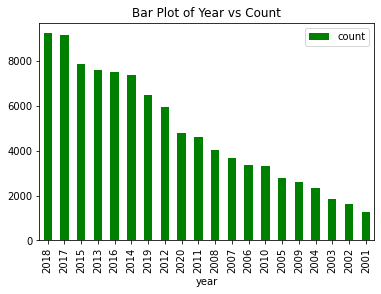

In [11]:
import matplotlib.pyplot as plt

# bar plot
pandasDF1[:20].plot(kind = 'bar',
        x = 'year',
        y = 'count',
        color = 'green')
  
# set the title
plt.title('Bar Plot of Year vs Count')
  
# show the plot
plt.show()

##Manufacturer Selection

In [12]:
from pyspark.sql import SparkSession

# Create a SparkSession

spark = SparkSession.builder.appName("MostCountManufacturer").getOrCreate()

# Load up data as dataframe
data = spark.read.option("header", "true").option("inferSchema", "true") \
    .csv("/content/drive/MyDrive/Spark Project/vehicles_final.csv")

# data.printSchema()

sortdata2=data.select('manufacturer').na.drop(subset=["manufacturer"]).groupBy("manufacturer").count().sort("count",ascending=False)


sortdata2.show()


+-------------+-----+
| manufacturer|count|
+-------------+-----+
|         ford|16288|
|    chevrolet|12483|
|       toyota|10101|
|        honda| 5940|
|       nissan| 5216|
|         jeep| 4194|
|          ram| 4079|
|          bmw| 4032|
|mercedes-benz| 3710|
|          gmc| 3499|
|        dodge| 3194|
|      hyundai| 2825|
|   volkswagen| 2626|
|        lexus| 2586|
|       subaru| 2459|
|          kia| 2309|
|         audi| 1900|
|        acura| 1624|
|     cadillac| 1557|
|        mazda| 1447|
+-------------+-----+
only showing top 20 rows



In [13]:
pandasDF2 = sortdata2.toPandas()
print(pandasDF2[:20])

     manufacturer  count
0            ford  16288
1       chevrolet  12483
2          toyota  10101
3           honda   5940
4          nissan   5216
5            jeep   4194
6             ram   4079
7             bmw   4032
8   mercedes-benz   3710
9             gmc   3499
10          dodge   3194
11        hyundai   2825
12     volkswagen   2626
13          lexus   2586
14         subaru   2459
15            kia   2309
16           audi   1900
17          acura   1624
18       cadillac   1557
19          mazda   1447


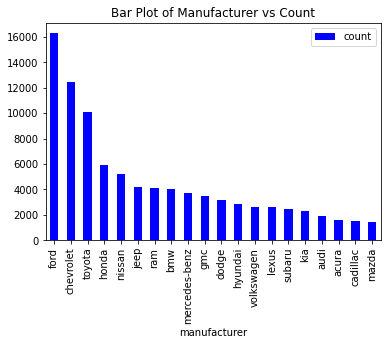

In [14]:
# bar plot
pandasDF2[:20].plot(kind = 'bar',
        x = 'manufacturer',
        y = 'count',
        color = 'blue')
  
# set the title
plt.title('Bar Plot of Manufacturer vs Count')



# show the plot
plt.show();

###Model Creation

In [15]:
#import the data file
used_car_data_set=pd.read_csv("/content/drive/MyDrive/Spark Project/vehicles_final.csv")
used_car_data_set

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106714,7312386119,https://orlando.craigslist.org/ctd/d/orlando-2...,orlando,https://orlando.craigslist.org,38990,2020.0,nissan,370z sport touring coupe,good,NaN,other,1692.0,clean,other,JN1AZ4EH3LM821190,rwd,NaN,coupe,silver,https://images.craigslist.org/00f0f_9oFS7EL78d...,Carvana is the safer way to buy a car During t...,NaN,fl,28.500000,-81.370000,2021-04-25T13:01:15-0400
106715,7312385970,https://orlando.craigslist.org/ctd/d/orlando-2...,orlando,https://orlando.craigslist.org,19590,2018.0,kia,soul + wagon 4d,good,NaN,gas,5304.0,clean,other,KNDJP3A58J7516126,fwd,NaN,wagon,red,https://images.craigslist.org/00a0a_ftdoME1WiL...,Carvana is the safer way to buy a car During t...,NaN,fl,28.500000,-81.370000,2021-04-25T13:01:03-0400
106716,7312384300,https://orlando.craigslist.org/ctd/d/orlando-2...,orlando,https://orlando.craigslist.org,129999,2018.0,mercedes-benz,maybach s560,like new,8 cylinders,gas,6000.0,clean,automatic,NaN,4wd,full-size,sedan,black,https://images.craigslist.org/00u0u_fKyDNpMeQR...,"Serious/ready buyers, please call or text @ (4...",NaN,fl,28.463700,-81.394800,2021-04-25T12:58:01-0400
106717,7312367926,https://orlando.craigslist.org/ctd/d/orlando-2...,orlando,https://orlando.craigslist.org,15950,2017.0,toyota,rav4,NaN,NaN,gas,58185.0,clean,automatic,2T3WFREV3HW318378,fwd,NaN,wagon,NaN,https://images.craigslist.org/00Y0Y_5TGG9emJEd...,2017 Toyota RAV4 XLE FWD Offered by: EVERY...,NaN,fl,28.567037,-81.291542,2021-04-25T12:28:04-0400


In [16]:
#see the data file
used_car_data_set.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,106679,106680,106681,106682,106683,106684,106685,106686,106687,106688,106689,106690,106691,106692,106693,106694,106695,106696,106697,106698,106699,106700,106701,106702,106703,106704,106705,106706,106707,106708,106709,106710,106711,106712,106713,106714,106715,106716,106717,106718
id,7222695916,7218891961,7221797935,7222270760,7210384030,7222379453,7221952215,7220195662,7209064557,7219485069,7218893038,7218325704,7217788283,7217147606,7209027818,7223509794,7222753076,7222206015,7220030122,7218423006,7216672204,7215617048,7213839225,7208549803,7213843538,7212631321,7219973522,7316814884,7316814758,7316814989,7316743432,7316356412,7316343444,7316304717,7316285779,7316257769,7316133914,7316130053,7315816316,7315770394,...,7312416055,7312414606,7312414436,7312412041,7312408918,7312408762,7312409671,7312408502,7312408222,7312407597,7312405274,7312402827,7312402719,7312401112,7312400555,7312399398,7312398556,7312397914,7312396966,7312396281,7312395670,7312394557,7312394417,7312394254,7312394119,7312393729,7312391804,7312391763,7312391751,7312391790,7312391775,7312391676,7312391653,7312386301,7312387353,7312386119,7312385970,7312384300,7312367926,7312354452
url,https://prescott.craigslist.org/cto/d/prescott...,https://fayar.craigslist.org/ctd/d/bentonville...,https://keys.craigslist.org/cto/d/summerland-k...,https://worcester.craigslist.org/cto/d/west-br...,https://greensboro.craigslist.org/cto/d/trinit...,https://hudsonvalley.craigslist.org/cto/d/west...,https://hudsonvalley.craigslist.org/cto/d/west...,https://hudsonvalley.craigslist.org/cto/d/poug...,https://medford.craigslist.org/cto/d/grants-pa...,https://erie.craigslist.org/cto/d/erie-2012-su...,https://elpaso.craigslist.org/ctd/d/el-paso-20...,https://elpaso.craigslist.org/ctd/d/el-paso-20...,https://elpaso.craigslist.org/ctd/d/el-paso-20...,https://elpaso.craigslist.org/ctd/d/el-paso-20...,https://elpaso.craigslist.org/ctd/d/el-paso-20...,https://bellingham.craigslist.org/ctd/d/bellin...,https://bellingham.craigslist.org/ctd/d/bellin...,https://bellingham.craigslist.org/ctd/d/bellin...,https://bellingham.craigslist.org/ctd/d/bellin...,https://bellingham.craigslist.org/ctd/d/bellin...,https://bellingham.craigslist.org/ctd/d/bellin...,https://bellingham.craigslist.org/ctd/d/bellin...,https://bellingham.craigslist.org/ctd/d/bellin...,https://bellingham.craigslist.org/ctd/d/bellin...,https://skagit.craigslist.org/ctd/d/bellingham...,https://skagit.craigslist.org/ctd/d/bellingham...,https://lacrosse.craigslist.org/cto/d/la-cross...,https://auburn.craigslist.org/ctd/d/auburn-uni...,https://auburn.craigslist.org/ctd/d/auburn-uni...,https://auburn.craigslist.org/ctd/d/auburn-uni...,https://auburn.craigslist.org/ctd/d/auburn-uni...,https://auburn.craigslist.org/cto/d/auburn-uni...,https://auburn.craigslist.org/ctd/d/auburn-uni...,https://auburn.craigslist.org/ctd/d/auburn-uni...,https://auburn.craigslist.org/cto/d/auburn-201...,https://auburn.craigslist.org/ctd/d/auburn-uni...,https://auburn.craigslist.org/ctd/d/auburn-uni...,https://auburn.craigslist.org/cto/d/opelika-19...,https://auburn.craigslist.org/ctd/d/auburn-uni...,https://auburn.craigslist.org/ctd/d/auburn-uni...,...,https://orlando.craigslist.org/ctd/d/orlando-2...,https://orlando.craigslist.org/ctd/d/orlando-2...,https://orlando.craigslist.org/ctd/d/orlando-2...,https://orlando.craigslist.org/ctd/d/orlando-2...,https://orlando.craigslist.org/ctd/d/orlando-2...,https://orlando.craigslist.org/ctd/d/orlando-2...,https://orlando.craigslist.org/ctd/d/orlando-2...,https://orlando.craigslist.org/cto/d/orlando-2...,https://orlando.craigslist.org/cto/d/orlando-2...,https://orlando.craigslist.org/ctd/d/orlando-2...,https://orlando.craigslist.org/ctd/d/orlando-2...,https://orlando.craigslist.org/cto/d/orlando-2...,https://orlando.craigslist.org/ctd/d/orlando-1...,https://orlando.craigslist.org/ctd/d/sarasota-...,https://or

In [17]:
#see the data file information
used_car_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106719 entries, 0 to 106718
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            106719 non-null  int64  
 1   url           106719 non-null  object 
 2   region        106719 non-null  object 
 3   region_url    106719 non-null  object 
 4   price         106719 non-null  int64  
 5   year          106286 non-null  float64
 6   manufacturer  102004 non-null  object 
 7   model         105340 non-null  object 
 8   condition     65482 non-null   object 
 9   cylinders     63468 non-null   object 
 10  fuel          106088 non-null  object 
 11  odometer      105148 non-null  float64
 12  title_status  104356 non-null  object 
 13  transmission  106127 non-null  object 
 14  VIN           68171 non-null   object 
 15  drive         74086 non-null   object 
 16  size          30276 non-null   object 
 17  type          85864 non-null   object 
 18  pain

In [18]:
#get the sum of null values for each column
used_car_data_set.isna().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year               433
manufacturer      4715
model             1379
condition        41237
cylinders        43251
fuel               631
odometer          1571
title_status      2363
transmission       592
VIN              38548
drive            32633
size             76443
type             20855
paint_color      31593
image_url           38
description         39
county          106719
state                0
lat                591
long               591
posting_date        38
dtype: int64

In [19]:
#drop the columns 
used_car_data_set_drop =used_car_data_set.drop(["id","url","region_url","VIN","image_url","description","county","lat","long","posting_date"],axis=1)
used_car_data_set_drop

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106714,orlando,38990,2020.0,nissan,370z sport touring coupe,good,NaN,other,1692.0,clean,other,rwd,NaN,coupe,silver,fl
106715,orlando,19590,2018.0,kia,soul + wagon 4d,good,NaN,gas,5304.0,clean,other,fwd,NaN,wagon,red,fl
106716,orlando,129999,2018.0,mercedes-benz,maybach s560,like new,8 cylinders,gas,6000.0,clean,automatic,4wd,full-size,sedan,black,fl
106717,orlando,15950,2017.0,toyota,rav4,NaN,NaN,gas,58185.0,clean,automatic,fwd,NaN,wagon,NaN,fl


In [20]:
#get the info about the columns 
used_car_data_set_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106719 entries, 0 to 106718
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        106719 non-null  object 
 1   price         106719 non-null  int64  
 2   year          106286 non-null  float64
 3   manufacturer  102004 non-null  object 
 4   model         105340 non-null  object 
 5   condition     65482 non-null   object 
 6   cylinders     63468 non-null   object 
 7   fuel          106088 non-null  object 
 8   odometer      105148 non-null  float64
 9   title_status  104356 non-null  object 
 10  transmission  106127 non-null  object 
 11  drive         74086 non-null   object 
 12  size          30276 non-null   object 
 13  type          85864 non-null   object 
 14  paint_color   75126 non-null   object 
 15  state         106719 non-null  object 
dtypes: float64(2), int64(1), object(13)
memory usage: 13.0+ MB


In [21]:
#see the null values in the selected columns in the data set
used_car_data_set_drop.isna().sum()

region              0
price               0
year              433
manufacturer     4715
model            1379
condition       41237
cylinders       43251
fuel              631
odometer         1571
title_status     2363
transmission      592
drive           32633
size            76443
type            20855
paint_color     31593
state               0
dtype: int64

In [22]:
#see the value counts in the price column
used_car_data_set_drop["price"].value_counts()

0        8736
1         915
4500      700
5500      689
6500      671
         ... 
23583       1
22823       1
13330       1
37894       1
2015        1
Name: price, Length: 6870, dtype: int64

In [23]:
#drop the prices containes less than 500 and Greter Than 
used_car_data_set_drop.drop(used_car_data_set_drop.loc[used_car_data_set_drop['price']<700].index, inplace=True)


In [24]:
used_car_data_set_drop.drop(used_car_data_set_drop.loc[used_car_data_set_drop['price']>99000].index, inplace=True)


In [25]:
#see the value count after dropping small values
used_car_data_set_drop["price"].value_counts()

4500     700
5500     689
6500     671
7500     648
9995     639
        ... 
26477      1
5987       1
18217      1
40690      1
20490      1
Name: price, Length: 6398, dtype: int64

In [26]:
len(used_car_data_set),len(used_car_data_set_drop)

(106719, 94730)

In [27]:
#drop the all rows conatins null values
used_car_data_set_drop_final =used_car_data_set_drop.dropna()
used_car_data_set_drop_final

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al
55,auburn,19900,2004.0,ford,f250 super duty,good,8 cylinders,diesel,88000.0,clean,automatic,4wd,full-size,pickup,blue,al
59,auburn,14000,2012.0,honda,odyssey,excellent,6 cylinders,gas,95000.0,clean,automatic,fwd,full-size,mini-van,silver,al
65,auburn,22500,2001.0,ford,f450,good,8 cylinders,diesel,144700.0,clean,manual,rwd,full-size,truck,white,al
73,auburn,15000,2017.0,dodge,charger rt 4dr sedan,excellent,8 cylinders,gas,90000.0,rebuilt,automatic,rwd,mid-size,sedan,grey,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106693,orlando,13500,2012.0,rover,range sport hse,like new,8 cylinders,gas,130000.0,clean,automatic,4wd,full-size,SUV,red,fl
106694,orlando,12695,2012.0,jeep,grand cherokee overland 4x4,like new,6 cylinders,gas,120000.0,clean,automatic,4wd,full-size,SUV,black,fl
106696,orlando,17600,2013.0,bmw,550i f10,like new,8 cylinders,gas,75300.0,clean,automatic,rwd,mid-size,sedan,black,fl
106698,orlando,14400,2014.0,subaru,impreza wrx premium,like new,4 cylinders,gas,101000.0,clean,manual,4wd,full-size,sedan,grey,fl


In [28]:
len(used_car_data_set_drop_final)

17502

In [29]:
#save the final clean data set to a new csv file.
used_car_data_set_drop_final.to_csv(r'/content/drive/MyDrive/Spark Project/car_data_set_drop_final.csv')

In [30]:
#find the columns which conatains strings
for label,content in used_car_data_set_drop_final.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

region
manufacturer
model
condition
cylinders
fuel
title_status
transmission
drive
size
type
paint_color
state


In [31]:
#turn categorical into numbers and fill missing
for label,content in used_car_data_set_drop_final.items():
    if not pd.api.types.is_numeric_dtype(content):
        #turn categories into numbers and add+1
        used_car_data_set_drop_final[label] =pd.Categorical(content).codes+1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [32]:
#final info after convering all the columns
used_car_data_set_drop_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17502 entries, 31 to 106704
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        17502 non-null  int8   
 1   price         17502 non-null  int64  
 2   year          17502 non-null  float64
 3   manufacturer  17502 non-null  int8   
 4   model         17502 non-null  int16  
 5   condition     17502 non-null  int8   
 6   cylinders     17502 non-null  int8   
 7   fuel          17502 non-null  int8   
 8   odometer      17502 non-null  float64
 9   title_status  17502 non-null  int8   
 10  transmission  17502 non-null  int8   
 11  drive         17502 non-null  int8   
 12  size          17502 non-null  int8   
 13  type          17502 non-null  int8   
 14  paint_color   17502 non-null  int8   
 15  state         17502 non-null  int8   
dtypes: float64(2), int16(1), int64(1), int8(12)
memory usage: 786.2 KB


In [33]:
used_car_data_set_drop_final.T   

,31,55,59,65,73,86,110,119,138,177,183,186,213,215,217,219,222,224,245,246,260,268,271,329,332,337,338,339,342,343,346,351,355,357,364,365,366,367,370,373,...,106508,106513,106515,106517,106522,106530,106541,106552,106560,106570,106611,106612,106627,106630,106635,106642,106644,106645,106647,106651,106658,106663,106672,106674,106675,106676,106677,106678,106679,106682,106685,106686,106688,106689,106691,106693,106694,106696,106698,106704
region,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0
price,15000.0,19900.0,14000.0,22500.0,15000.0,3000.0,9500.0,17500.0,4000.0,22950.0,10950.0,21250.0,32000.0,4000.0,3000.0,2500.0,12500.0,2500.0,5500.0,3500.0,45000.0,9000.0,19950.0,19500.0,15000.0,8950.0,4000.0,50000.0,1200.0,8888.0,98900.0,16500.0,9400.0,7900.0,7300.0,72900.0,28900.0,17000.0,5950.0,8900.0,...,6500.0,16977.0,6995.0,4995.0,13500.0,7395.0,5998.0,1000.0,2000.0,1500.0,6900.0,11500.0,6700.0,11999.0,7800.0,8750.0,1995.0,8500.0,13850.0,4900.0,6995.0,1000.0,9900.0,9500.0,2900.0,15490.0,15495.0,7900.0,16500.0,13800.0,14695.0,8990.0,18995.0,9595.0,13495.0,13500.0,12695.0,17600.0,14400.0,19995.0
year,2013.0,2004.0,2012.0,2001.0,2017.0,2004.0,2003.0,2008.0,2006.0,2014.0,2009.0,2002.0,2008.0,2002.0,2004.0,1995.0,2008.0,2008.0,1974.0,1996.0,2017.0,2008.0,1955.0,2008.0,2009.0,2011.0,1972.0,2019.0,2005.0,2005.0,2001.0,2011.0,2008.0,2013.0,2007.0,2021.0,2017.0,2019.0,2007.0,2013.0,...,2007.0,2013.0,2004.0,2004.0,2006.0,2013.0,2014.0,2007.0,2012.0,2012.0,2009.0,2003.0,2009.0,2013.0,2012.0,2012.0,2006.0,2005.0,2011.0,2007.0,2012.0,1996.0,2010.0,2004.0,2005.0,2013.0,2014.0,2012.0,2014.0,2014.0,2015.0,2008.0,2015.0,2009.0,2015.0,2012.0,2012.0,2013.0,2014.0,2011.0
manufacturer,14.0,14.0,17.0,14.0,11.0,9.0,9.0,39.0,21.0,14.0,24.0,14.0,8.0,39.0,8.0,5.0,15.0,17.0,27.0,8.0,8.0,26.0,8.0,34.0,39.0,14.0,27.0,39.0,8.0,31.0,12.0,14.0,27.0,31.0,24.0,8.0,4.0,8.0,30.0,39.0,...,21.0,14.0,24.0,34.0,39.0,14.0,14.0,17.0,17.0,39.0,17.0,14.0,39.0,17.0,29.0,27.0,31.0,14.0,5.0,17.0,9.0,14.0,35.0,24.0,14.0,14.0,27.0,39.0,11.0,11.0,37.0,27.0,5.0,27.0,40.0,35.0,21.0,5.0,37.0,39.0
model,1584.0,1702.0,2588.0,1749.0,923.0,3523.0,3523.0,1807.0,2020.0,1681.0,2960.0,3483.0,3187.0,1323.0,746.0,334.0,3881.0,486.0,55.0,3444.0,3168.0,2453.0,630.0,234.0,3414.0,1555.0,633.0,3596.0,2114.0,551.0,267.0,1702.0,663.0,2677.0,2960.0,3444.0,2787.0,3575.0,1324.0,2722.0,...,2007.0,1337.0,2064.0,14.0,3600.0,1460.0,1780.0,2591.0,507.0,855.0,978.0,3381.0,846.0,512.0,1053.0,657.0,538.0,1634.0,309.0,2588.0,65.0,2839.0,2829.0,2066.0,1447.0,1495.0,997.0,856.0,1258.0,1258.0,773.0,710.0,3797.0,1972.0,2056.0,2829.0,2031.0,366.0,2148.0,295.0
condition,1.0,3.0,1.0,3.0,1.0,3.0,1.0,3.0,3.0,1.0,1.0,5.0,3.0,1.0,3.0,2.0,1.0,3.0,3.0,1.0,1.0,1.0,3.0,3.0,3.0,1.0,2.0,4.0,2.0,1.0,3.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,...,4.0,3.0,3.0,1.0,3.0,4.0,4.0,4.0,4.0,4.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,2.0,1.0,3.0,3.0,2.0,4.0,4.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
cylinders,6.0,7.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,7.0,6.0,7.0,7.0,4.0,6.0,6.0,7.0,6.0,4.0,7.0,7.0,4.0,7.0,6.0,6.0,6.0,6.0,7.0,4.0,6.0,7.0,7.0,6.0,6.0,6.0,7.0,6.0,4.0,4.0,4.0,...,6.0,7.0,7.0,6.0,7.0,4.0,4.0,6.0,6.0,4.0,4.0,7.0,4.0,4.0,4.0,6.0,4.0,7.0,6.0,4.0,4.0,4.0,7.0,6.0,6.0,7.0,4.0,4.0,6.0,6.0,4.0,6.0,6.0,7.0,4.0,7.0,6.0,7.0,4.0,6.0
fuel,3.0,1.0,3.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
odometer,128000.0,88000.0,95000.0,144700.0,90000.0,176144.0,30376.0,201300.

In [34]:
# #resetting the indexeds of the data set
# used_car_data_set_drop_final=used_car_data_set_drop_final.reset_index(drop=True)



In [35]:
#save the final clean data set to a new csv file.
used_car_data_set_drop_final.to_csv(r'/content/drive/MyDrive/Spark Project/cleaned_car_data_set.csv')

In [36]:
pip install pyspark

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
from __future__ import print_function

from pyspark.ml.regression import GBTRegressor
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler

In [39]:
# Create a SparkSession
spark = SparkSession.builder.appName("GBTRegressor").getOrCreate()


In [40]:
# Load up data as dataframe
data = spark.read.option("header", "true").option("inferSchema", "true") \
    .csv("file:////content/drive/MyDrive/Spark Project/cleaned_car_data_set.csv")

data.printSchema()


root
 |-- _c0: integer (nullable = true)
 |-- region: integer (nullable = true)
 |-- price: integer (nullable = true)
 |-- year: double (nullable = true)
 |-- manufacturer: integer (nullable = true)
 |-- model: integer (nullable = true)
 |-- condition: integer (nullable = true)
 |-- cylinders: integer (nullable = true)
 |-- fuel: integer (nullable = true)
 |-- odometer: double (nullable = true)
 |-- title_status: integer (nullable = true)
 |-- transmission: integer (nullable = true)
 |-- drive: integer (nullable = true)
 |-- size: integer (nullable = true)
 |-- type: integer (nullable = true)
 |-- paint_color: integer (nullable = true)
 |-- state: integer (nullable = true)



In [41]:
import six
for i in data.columns:
    if not( isinstance(data.select(i).take(1)[0][0], six.string_types)):
        print( "Correlation to Price for ", i, data.stat.corr('price',i))

Correlation to Price for  _c0 -0.07905135099853673
Correlation to Price for  region -0.08767993207154225
Correlation to Price for  price 1.0
Correlation to Price for  year 0.23621169391341004
Correlation to Price for  manufacturer -0.04471469629913122
Correlation to Price for  model 0.06288568437470332
Correlation to Price for  condition 0.014448446503770175
Correlation to Price for  cylinders 0.24624337558061232
Correlation to Price for  fuel -0.30621068425053927
Correlation to Price for  odometer -0.1635855263308702
Correlation to Price for  title_status -0.04874592652002595
Correlation to Price for  transmission -0.04775221156506131
Correlation to Price for  drive -0.13628318919054405
Correlation to Price for  size -0.026564219187093254
Correlation to Price for  type 0.07354813005750643
Correlation to Price for  paint_color 0.03843774028808499
Correlation to Price for  state -0.06450851070791656


In [42]:
# assembler = VectorAssembler().setInputCols(
#     ["region","year", "manufacturer", "model", "condition", "cylinders", "fuel", "odometer", "title_status",
#      "transmission", "drive", "size", "type", "paint_color", "state"]).setOutputCol("features")

In [43]:
assembler = VectorAssembler(inputCols=["region","year","manufacturer","model","condition","cylinders","fuel","odometer","title_status","transmission","drive","size","type","paint_color","state"],outputCol="features")

In [44]:
df = assembler.transform(data)


In [45]:
df.show()

+---+------+-----+------+------------+-----+---------+---------+----+--------+------------+------------+-----+----+----+-----------+-----+--------------------+
|_c0|region|price|  year|manufacturer|model|condition|cylinders|fuel|odometer|title_status|transmission|drive|size|type|paint_color|state|            features|
+---+------+-----+------+------------+-----+---------+---------+----+--------+------------+------------+-----+----+----+-----------+-----+--------------------+
| 31|     3|15000|2013.0|          14| 1584|        1|        6|   3|128000.0|           1|           1|    3|   2|  11|          1|    2|[3.0,2013.0,14.0,...|
| 55|     3|19900|2004.0|          14| 1702|        3|        7|   1| 88000.0|           1|           1|    1|   2|   9|          2|    2|[3.0,2004.0,14.0,...|
| 59|     3|14000|2012.0|          17| 2588|        1|        6|   3| 95000.0|           1|           1|    2|   2|   6|         10|    2|[3.0,2012.0,17.0,...|
| 65|     3|22500|2001.0|          14| 1

In [46]:
df.select("features").show()

+--------------------+
|            features|
+--------------------+
|[3.0,2013.0,14.0,...|
|[3.0,2004.0,14.0,...|
|[3.0,2012.0,17.0,...|
|[3.0,2001.0,14.0,...|
|[3.0,2017.0,11.0,...|
|[3.0,2004.0,9.0,3...|
|[3.0,2003.0,9.0,3...|
|[3.0,2008.0,39.0,...|
|[3.0,2006.0,21.0,...|
|[5.0,2014.0,14.0,...|
|[5.0,2009.0,24.0,...|
|[5.0,2002.0,14.0,...|
|[5.0,2008.0,8.0,3...|
|[5.0,2002.0,39.0,...|
|[5.0,2004.0,8.0,7...|
|[5.0,1995.0,5.0,3...|
|[5.0,2008.0,15.0,...|
|[5.0,2008.0,17.0,...|
|[5.0,1974.0,27.0,...|
|[5.0,1996.0,8.0,3...|
+--------------------+
only showing top 20 rows



In [47]:
finalized_data=df.select("features","price")
finalized_data.show()

+--------------------+-----+
|            features|price|
+--------------------+-----+
|[3.0,2013.0,14.0,...|15000|
|[3.0,2004.0,14.0,...|19900|
|[3.0,2012.0,17.0,...|14000|
|[3.0,2001.0,14.0,...|22500|
|[3.0,2017.0,11.0,...|15000|
|[3.0,2004.0,9.0,3...| 3000|
|[3.0,2003.0,9.0,3...| 9500|
|[3.0,2008.0,39.0,...|17500|
|[3.0,2006.0,21.0,...| 4000|
|[5.0,2014.0,14.0,...|22950|
|[5.0,2009.0,24.0,...|10950|
|[5.0,2002.0,14.0,...|21250|
|[5.0,2008.0,8.0,3...|32000|
|[5.0,2002.0,39.0,...| 4000|
|[5.0,2004.0,8.0,7...| 3000|
|[5.0,1995.0,5.0,3...| 2500|
|[5.0,2008.0,15.0,...|12500|
|[5.0,2008.0,17.0,...| 2500|
|[5.0,1974.0,27.0,...| 5500|
|[5.0,1996.0,8.0,3...| 3500|
+--------------------+-----+
only showing top 20 rows



In [48]:
# split data into training data and testing data
trainTest = finalized_data.randomSplit([0.8, 0.2], seed=2000)
trainingDF = trainTest[0]
testDF = trainTest[1]

In [49]:
print("Training Dataset Count: " + str(trainingDF.count()))
print("Test Dataset Count: " + str(testDF.count()))


Training Dataset Count: 14072
Test Dataset Count: 3430


In [50]:
#create our Model
dtr = GBTRegressor().setFeaturesCol("features").setLabelCol("price")


In [51]:
# Train the model using training data
model = dtr.fit(trainingDF)

In [52]:
# Generate predictions using model for all features
fullPredictions = model.transform(testDF).cache()

In [53]:
# Extract the predictions and the "known" correct labels.
predictions = fullPredictions.select("prediction").rdd.map(lambda x: x[0])
labels = fullPredictions.select("price").rdd.map(lambda x: x[0])


In [54]:
# Zip them together
predictionAndLabel = predictions.zip(labels).collect()

In [55]:
x_values=[]
y_values=[]

# Print out the predicted and actual values for each point

for prediction in predictionAndLabel:
    print(prediction)

    x_values.append(prediction[0])
    y_values.append(prediction[1])


(15253.981101280473, 12500)
(20977.51815246614, 19990)
(15924.04514163248, 11000)
(6644.617128590448, 4300)
(5516.916664650334, 850)
(9235.881706882361, 7900)
(4979.63673212047, 1500)
(3700.5231213918614, 4750)
(10276.152616030213, 4000)
(4979.63673212047, 3999)
(4524.9464540835625, 2850)
(6812.254338079285, 6950)
(6508.21568871995, 6500)
(4225.057359231956, 4500)
(3141.966212887335, 2000)
(4888.5605199052625, 5900)
(7125.628885303923, 4600)
(13309.684539263522, 10500)
(14064.633946743388, 29990)
(3700.5231213918614, 4600)
(3530.225627159363, 3700)
(1001.7454373243302, 900)
(4835.214487709493, 4500)
(3727.9442841587675, 3300)
(4829.886766777887, 5500)
(5509.332851191096, 2500)
(3560.7525129105306, 5200)
(2947.219100559089, 2000)
(9608.809196093474, 9800)
(5904.073520661665, 3900)
(3543.836549792405, 2950)
(7956.9967514334285, 5000)
(7113.910960277278, 7700)
(13596.624113364804, 13000)
(3956.9639759859206, 1200)
(13224.710164373071, 15000)
(19365.044990297018, 21500)
(8328.282017458157,

In [56]:
print(len(x_values))
counter =[]
for i in range(len(x_values)):
    counter.append(i)


3430


In [57]:
pip install matplotlib

In [58]:

import matplotlib.pyplot as plt
import numpy as np

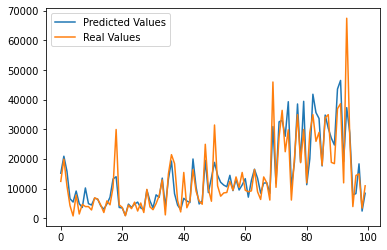

In [59]:
# create data
x = x_values[:100]
y = y_values[:100]

# plot lines
plt.plot(counter[:100], x, label="Predicted Values")
plt.plot(counter[:100], y, label="Real Values")

plt.legend()
plt.show()

In [60]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rmse = sqrt(mean_squared_error(x_values, y_values))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 5903.731


In [61]:
model.featureImportances

SparseVector(15, {0: 0.0149, 1: 0.2678, 2: 0.0734, 3: 0.0366, 4: 0.0719, 5: 0.1468, 6: 0.0466, 7: 0.1482, 8: 0.0184, 9: 0.0097, 10: 0.0621, 11: 0.005, 12: 0.0776, 13: 0.0048, 14: 0.0164})


GBTRegressor -Test RMSE: 5847.001

RandomForestRegressor -Test RMSE: 7306.500

DecisionTreeRegressor -Test RMSE: 7802.340

LinearRegression -Test RMSE: 10645.951307

IsotonicRegression -Test RMSE: 12669.295

FMRegressor -Test RMSE: 6732737.416



##Liner Regression

In [62]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = ['region', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size', 'type',"paint_color","state"], outputCol = 'features')
cars_df = vectorAssembler.transform(data)
cars_df = cars_df.select(['features', 'price'])
cars_df.show(3)

+--------------------+-----+
|            features|price|
+--------------------+-----+
|[3.0,2013.0,14.0,...|15000|
|[3.0,2004.0,14.0,...|19900|
|[3.0,2012.0,17.0,...|14000|
+--------------------+-----+
only showing top 3 rows



In [63]:
splits = cars_df.randomSplit([0.8, 0.2])
train_df = splits[0]
test_df = splits[1]

In [64]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='price', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(train_df)
print("Intercept: " + str(lr_model.intercept))

Intercept: -623990.1192718847


In [65]:
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 10647.557466
r2: 0.246298


In [66]:
train_df.describe().show()

+-------+------------------+
|summary|             price|
+-------+------------------+
|  count|             14019|
|   mean| 14165.13153577288|
| stddev|12264.949064274777|
|    min|               750|
|    max|             98995|
+-------+------------------+



In [67]:
lr_predictions = lr_model.transform(test_df)
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="price",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

R Squared (R2) on test data = 0.24438


In [68]:
test_result = lr_model.evaluate(test_df)
print("Root Mean Squared Error (RMSE) on test data = %g" % test_result.rootMeanSquaredError)

Root Mean Squared Error (RMSE) on test data = 10851.3


In [69]:
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()

numIterations: 10
objectiveHistory: [0.5, 0.4748906263981651, 0.4035238616875599, 0.37816558362794933, 0.3771034893504422, 0.3768836493385466, 0.3768773555705074, 0.3768766512254048, 0.3768766254757181, 0.3768766246723627, 0.3768766245191718]
+-------------------+
|          residuals|
+-------------------+
|  40431.69083379279|
| 11593.788894811412|
|  37179.12394405587|
| 29468.042951130075|
| 25684.727803086746|
| 193.60333537787665|
| 24426.637906843913|
|  2774.504292449332|
|  27766.71535614261|
| 12759.316066282336|
|  5001.562619677279|
|  19201.15343595529|
| -7829.797582444502|
|-1769.8334054551087|
| 2578.1935187298805|
| -8561.894761578995|
| 2717.2089710673317|
|  7336.631322774338|
| -914.6223630253226|
| -5082.736713799997|
+-------------------+
only showing top 20 rows



In [70]:
predictions = lr_model.transform(test_df)
predictions.select("prediction","price","features").show()

+------------------+-----+--------------------+
|        prediction|price|            features|
+------------------+-----+--------------------+
| 5038.471786373295|44000|[1.0,1966.0,14.0,...|
| 4594.999885467114| 7500|[1.0,1968.0,11.0,...|
|10323.186605367344|17500|[1.0,1984.0,8.0,5...|
|10076.638637001393| 1900|[1.0,1989.0,27.0,...|
|13292.195404674625| 6500|[1.0,1990.0,14.0,...|
| 10084.69351105392| 1250|[1.0,1990.0,27.0,...|
| 6433.247096580337| 1800|[1.0,1994.0,1.0,2...|
|10062.382761329529|11000|[1.0,1995.0,21.0,...|
| 5683.268699274282| 2499|[1.0,1996.0,17.0,...|
|15447.264199699392| 5900|[1.0,1998.0,14.0,...|
|14459.672613553586|11750|[1.0,1999.0,5.0,3...|
|12196.220112414565| 1100|[1.0,1999.0,39.0,...|
| 7713.526162848924| 9000|[1.0,1999.0,39.0,...|
| 14545.41588655964| 4000|[1.0,2000.0,39.0,...|
| 8353.747630974278| 2850|[1.0,2000.0,39.0,...|
| 16643.70062077779| 4600|[1.0,2002.0,14.0,...|
| 27965.83034969517|10500|[1.0,2002.0,14.0,...|
|14160.347096061916| 4600|[1.0,2002.0,24

##Decision Tree Regressor


In [71]:
from pyspark.ml.regression import DecisionTreeRegressor
dt = DecisionTreeRegressor(featuresCol ='features', labelCol = 'price')
dt_model = dt.fit(train_df)
dt_predictions = dt_model.transform(test_df)
dt_evaluator = RegressionEvaluator(
    labelCol="price", predictionCol="prediction", metricName="rmse")
rmse = dt_evaluator.evaluate(dt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 7580.76


In [72]:
dt_model.featureImportances

SparseVector(15, {1: 0.4719, 2: 0.0034, 3: 0.002, 4: 0.0015, 5: 0.2157, 6: 0.122, 7: 0.136, 10: 0.0462, 12: 0.0012})